In [1]:
%pylab inline

/Users/redsh/tf/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys,os
sys.path.append('..')
import tensorflow as tf
import config

from NeuralNet.convnetshared1 import NNModel
from NeuralNet.data_model import TrainingData

"""Restores a tensorflow session and returns it if successful
"""
net_model = NNModel()

tf_config = tf.ConfigProto(device_count = {'GPU':config.should_use_gpu})
sess = tf.Session(config=tf_config)

# Add ops to save and restore all of the variables
saver = tf.train.Saver()

# Load the model checkpoint file
try:
        tmp_file = config.tf_checkpoint_file
        print("Loading model from config: {}".format(tmp_file))
except:
    tmp_file = config.load('last_tf_model') #gets the cached last tf trained model
    print "loading latest trained model: " + str(tmp_file)
        # print("CAN'T FIND THE GOOD MODEL")
        # sys.exit(-1)

# Try to restore a session
try:
        saver.restore(sess, tmp_file)
except:
        print("Error restoring TF model: {}".format(tmp_file))
        # sys.exit(-1)



loading latest trained model: /Users/redsh/convnet02-results/2017_10_14__11_53_40_AM/model.ckpt
INFO:tensorflow:Restoring parameters from /Users/redsh/convnet02-results/2017_10_14__11_53_40_AM/model.ckpt


In [3]:
# TODO: https://gist.github.com/falcondai/561d5eec7fed9ebf48751d124a77b087

In [ ]:
image_tensor = net_model.in_image
G = tf.gradients(net_model.steering_regress_result, image_tensor)


In [4]:
resized = np.zeros((128,128,3))
batch = TrainingData.fromfilename('test',os.path.expanduser('~')+'/training-data/')

batch.TrimArray(1, 1)

print batch.pic_array.shape


Loaded pics, shape: (8621, 49152)
(1, 49152)


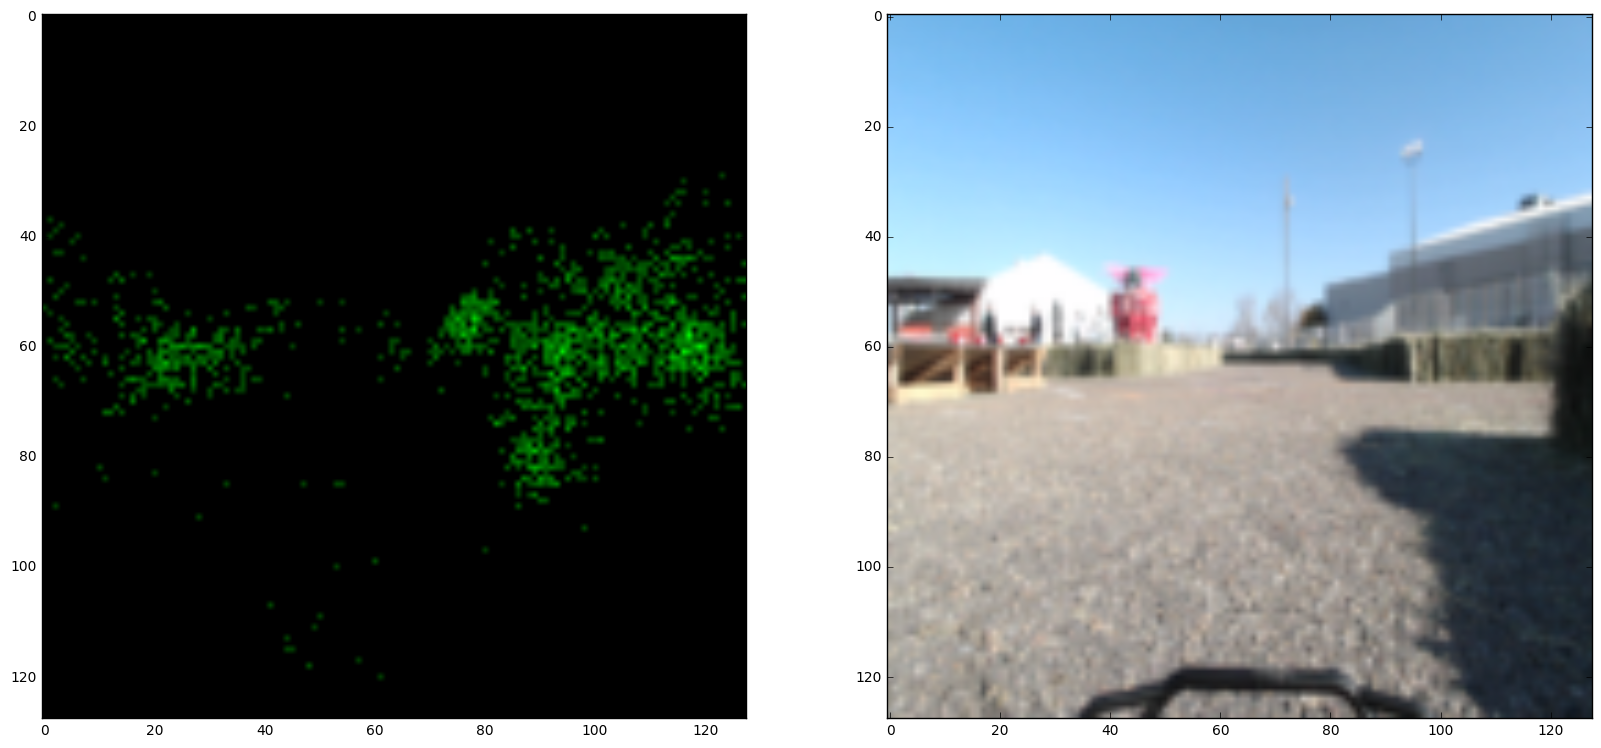

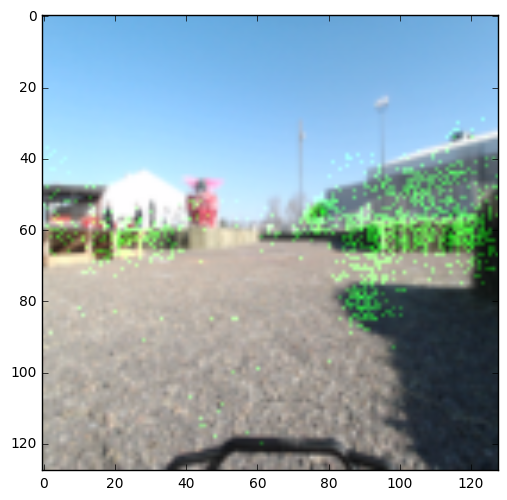

In [19]:
[flattened_gradient_image] = sess.run(
    [G],  feed_dict=batch.FeedDict(net_model))[0]

gradient_image = flattened_gradient_image.reshape((128,128,3))

gradient_image_mono = np.sqrt(gradient_image[:,:,:]**2).sum(axis=2)

gradient_image_mono_norm = (gradient_image_mono-gradient_image_mono.min())/(gradient_image_mono.max()-gradient_image_mono.min())

clip_min = gradient_image_mono_norm.max()*0.25 # Top energy?
gradient_image_mono_norm[gradient_image_mono_norm<clip_min] = 0

scale = np.zeros(list(gradient_image_mono_norm.shape)+[3], dtype=np.float32)
scale[:,:,0] = 0.0
scale[:,:,1] = gradient_image_mono_norm
scale[:,:,2] = 0.0

image_rgb = batch.pic_array.reshape((128,128,3))
image_rgb_f = image_rgb.astype(np.float32)

figure(figsize=(20,20))
subplot(1,2,1)
imshow(scale)
#print scale.min(),scale.max()

subplot(1,2,2)
imshow(image_rgb)

dbg = image_rgb_f + scale*255
dbg[dbg > 255] = 255
dbg = dbg.astype(np.uint8)

figure(figsize=(20,20))
subplot(1,3,3)
imshow(dbg)

show()



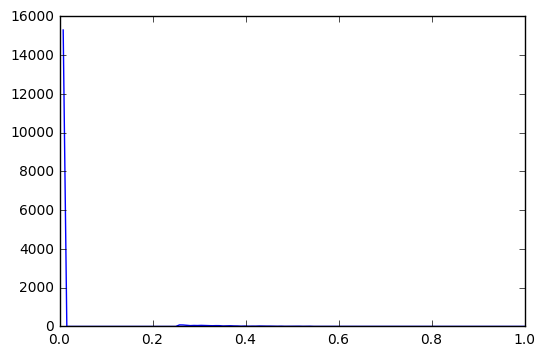

In [20]:
y, x = histogram(gradient_image_mono_norm,bins=128)
plot(x[1:],y)
